## Business Context

Ads24x7 is a Digital Marketing company that has recently secured a seed funding of $10 million. As part of its expansion into Marketing Analytics, the company aims to leverage data collected by its Marketing Intelligence team to gain insights and optimize its digital advertising strategies.


## Objective

The primary objective is to segment the different types of digital ads into homogeneous groups using clustering techniques. This segmentation will help Ads24x7 identify patterns and trends in ad performance, allowing them to make data-driven decisions to enhance the effectiveness of their marketing campaigns. The specific steps to achieve this objective include:

1.Data Exploration and Preparation

2.Data Normalization

3.Clustering Analysis

4.Cluster Profiling

5.Summary and Recommendations



# Data Dictionary:

Timestamp:	The Timestamp of the particular Advertisement. 

InventoryType:	The Inventory Type of the particular Advertisement. Format 1 to 7. This is a Categorical Variable. 

Ad - Length:	The Length Dimension of the particular Adverstisement. 

Ad- Width:	The Width Dimension of the particular Advertisement. 

Ad Size:	The Overall Size of the particular Advertisement. Length*Width. 

Ad Type:	The type of the particular Advertisement. This is a Categorical Variable.

Platform:	The platform in which the particular Advertisement is displayed. Web, Video or App. This is a Categorical Variable.

Device: Type	The type of the device which supports the partciular Advertisement. This is a Categorical Variable.

Format:	The Format in which the Advertisement is displayed. This is a Categorical Variable. 

Available_Impressions:	How often the particular Advertisement is shown. An impression is counted each time an Advertisement is shown on a search result page or other site on a Network. 

Matched_Queries:	Matched search queries data is pulled from Advertising Platform and consists of the exact searches typed into the search Engine that generated clicks for the particular Advertisement. 

Impressions:	The impression count of the particular Advertisement out of the total available impressions. 

Clicks:	It is a marketing metric that counts the number of times users have clicked on the particular advertisement to reach an online property.

Spend:	It is the amount of money spent on specific ad variations within a specific campaign or ad set. This metric helps regulate ad performance.

Fee:	The percentage of the Advertising Fees payable by Franchise Entities. 

Revenue:	It is the income that has been earned from the particular advertisement.

CTR:	CTR stands for "Click through rate". CTR is the number of clicks that your ad receives divided by the number of times your ad is shown. Formula used here is CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column and the Total Measured Ad Impressions refers to the 'Impressions' Column. 

CPM:	CPM stands for "cost per 1000 impressions." Formula used here is CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column and the Number of Impressions refers to the 'Impressions' Column. 

CPC:	CPC stands for "Cost-per-click". Cost-per-click (CPC) bidding means that you pay for each click on your ads. The Formula used here is CPC = Total Cost (spend) / Number of Clicks. Note that the Total Cost (spend) refers to the 'Spend' Column and the Number of Clicks refers to the 'Clicks' Column. 


## Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

 # Import libraries and load data

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
# load the dataset
df = pd.read_excel("C:/Users/AKHIL MOHANDAS/Documents/Study_Material/Project 4/Clustering+Clean+Ads_Data.xlsx",sheet_name='Data')

### Displaying a few rows (head and tail)

In [3]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [4]:
df.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


### Information about the dataset:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

Values are missing for 'CTR' , 'CPM' and 'CPC'.

In [6]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  23066 
no. of columns:  19


### Summary statistics

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


### Handling null values

In [8]:
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

Found 4736 null values for CTR, CPM and CPC

We can use the following formula to solve the question:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset.

CPC = Total Cost (spend) / Number of Clicks. Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset.

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset.

In [9]:
def calculate_cpc(i):
    spend=df.Spend
    click=df.Clicks
    cpc=(spend/click)
    return cpc

def calculate_cpm(i):
    spend=df.Spend
    impression=df.Impressions
    cpc=(spend/impression)*1000
    return cpc

def calculate_ctr(i):
    impression=df.Impressions
    click=df.Clicks
    cpc=(click/impression*100)
    return cpc

In [10]:
df['CPM'] = df[['CPM']].apply(lambda i : calculate_cpm(i))
df['CPC'] = df[['CPC']].apply(lambda i : calculate_cpc(i))
df['CTR'] = df[['CTR']].apply(lambda i : calculate_ctr(i))

In [11]:
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

### Duplicate values:

In [12]:
df.duplicated().sum()

0

No duplicate values.

## Univariate analysis

### Numerical variables:

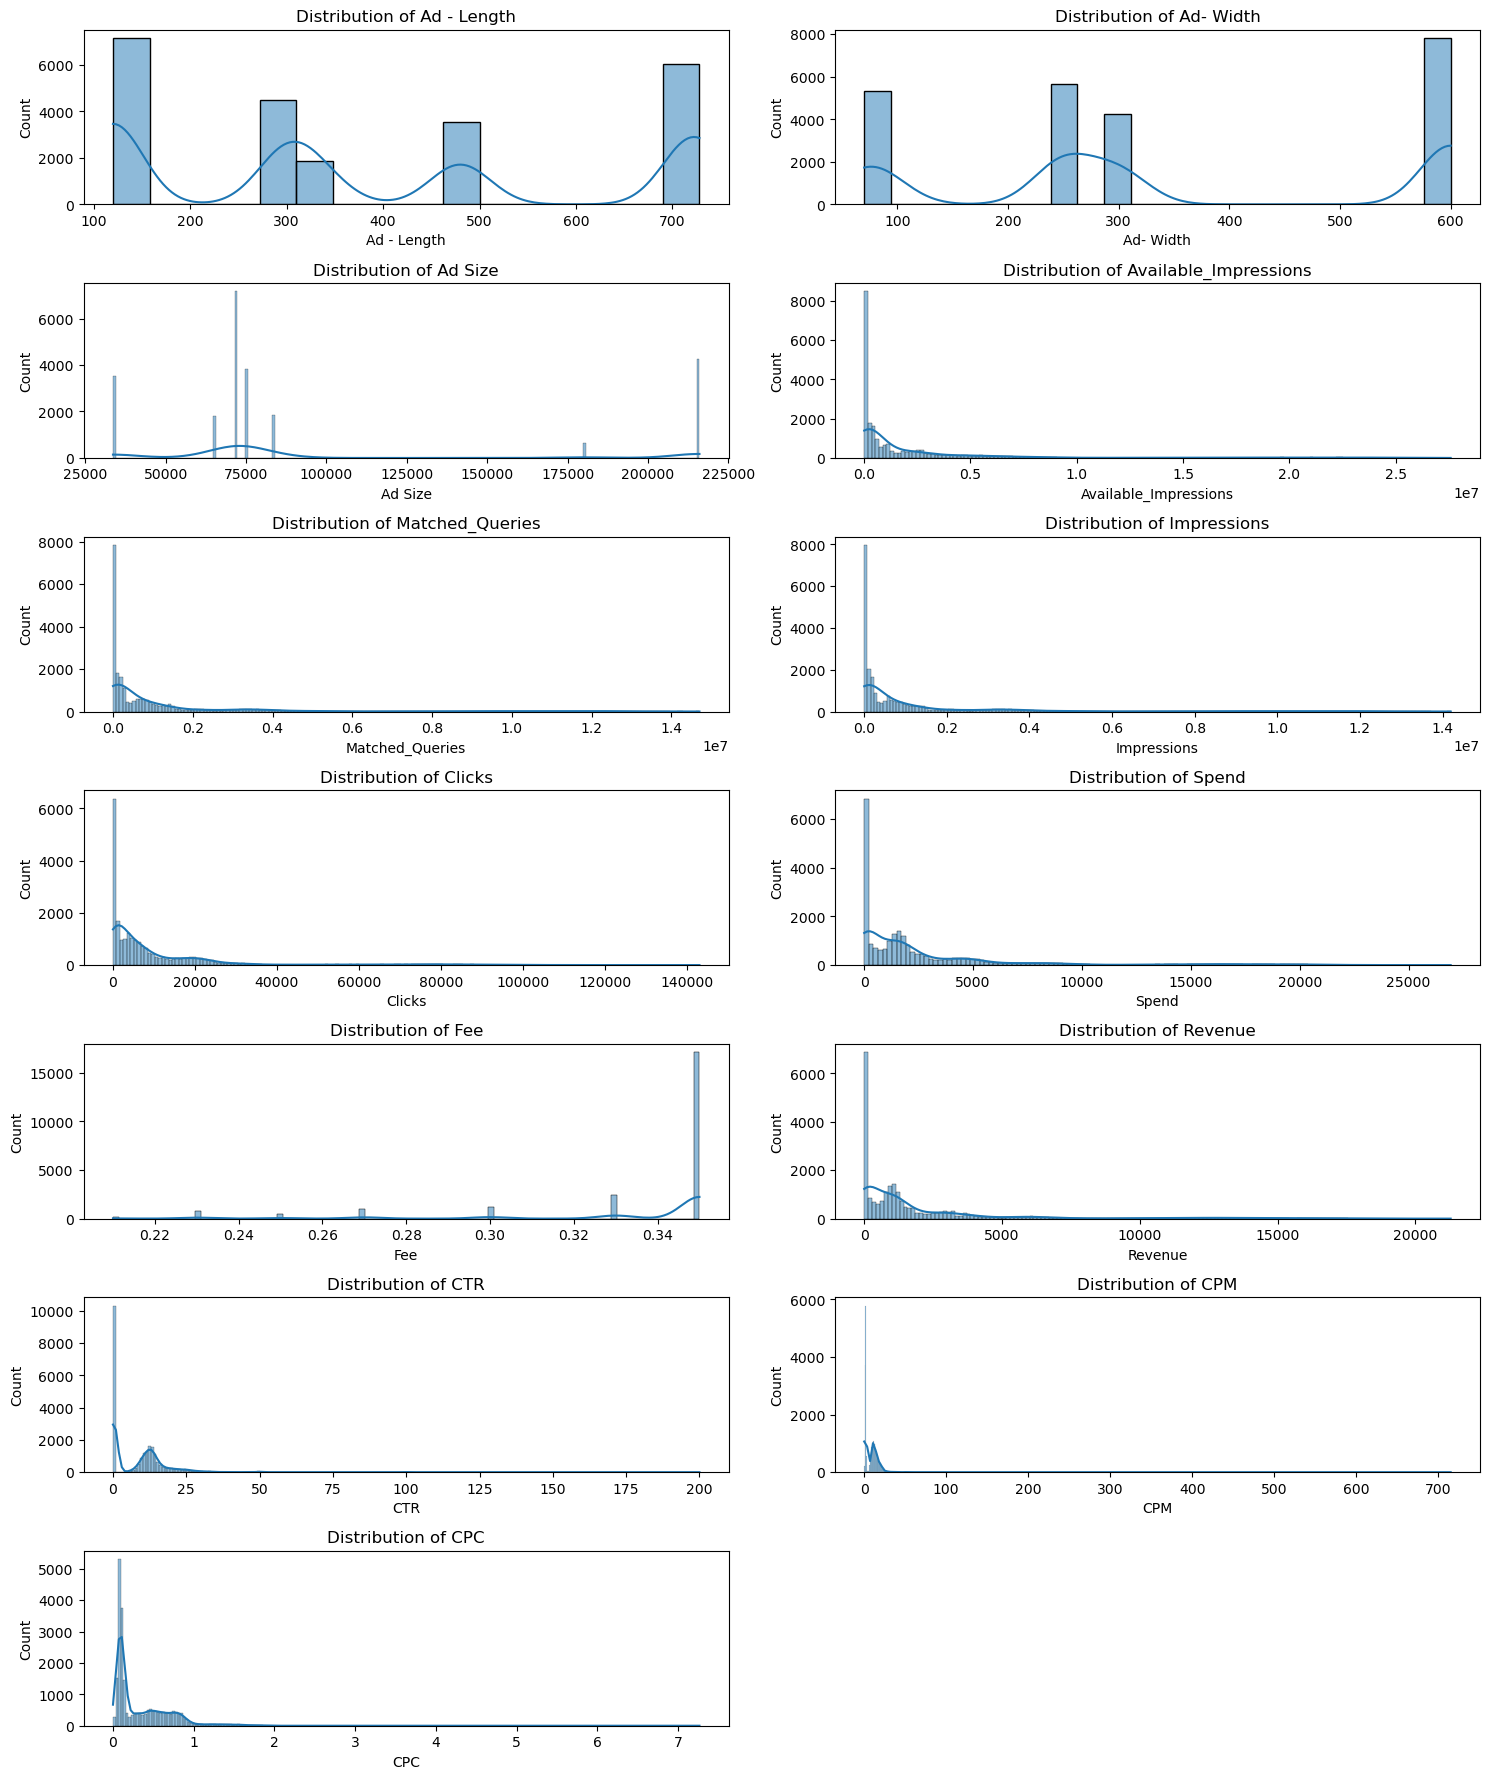

In [13]:
numerical_columns = df.select_dtypes(include=['number']).columns

#histograms
plt.figure(figsize=(15, 20))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(8, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

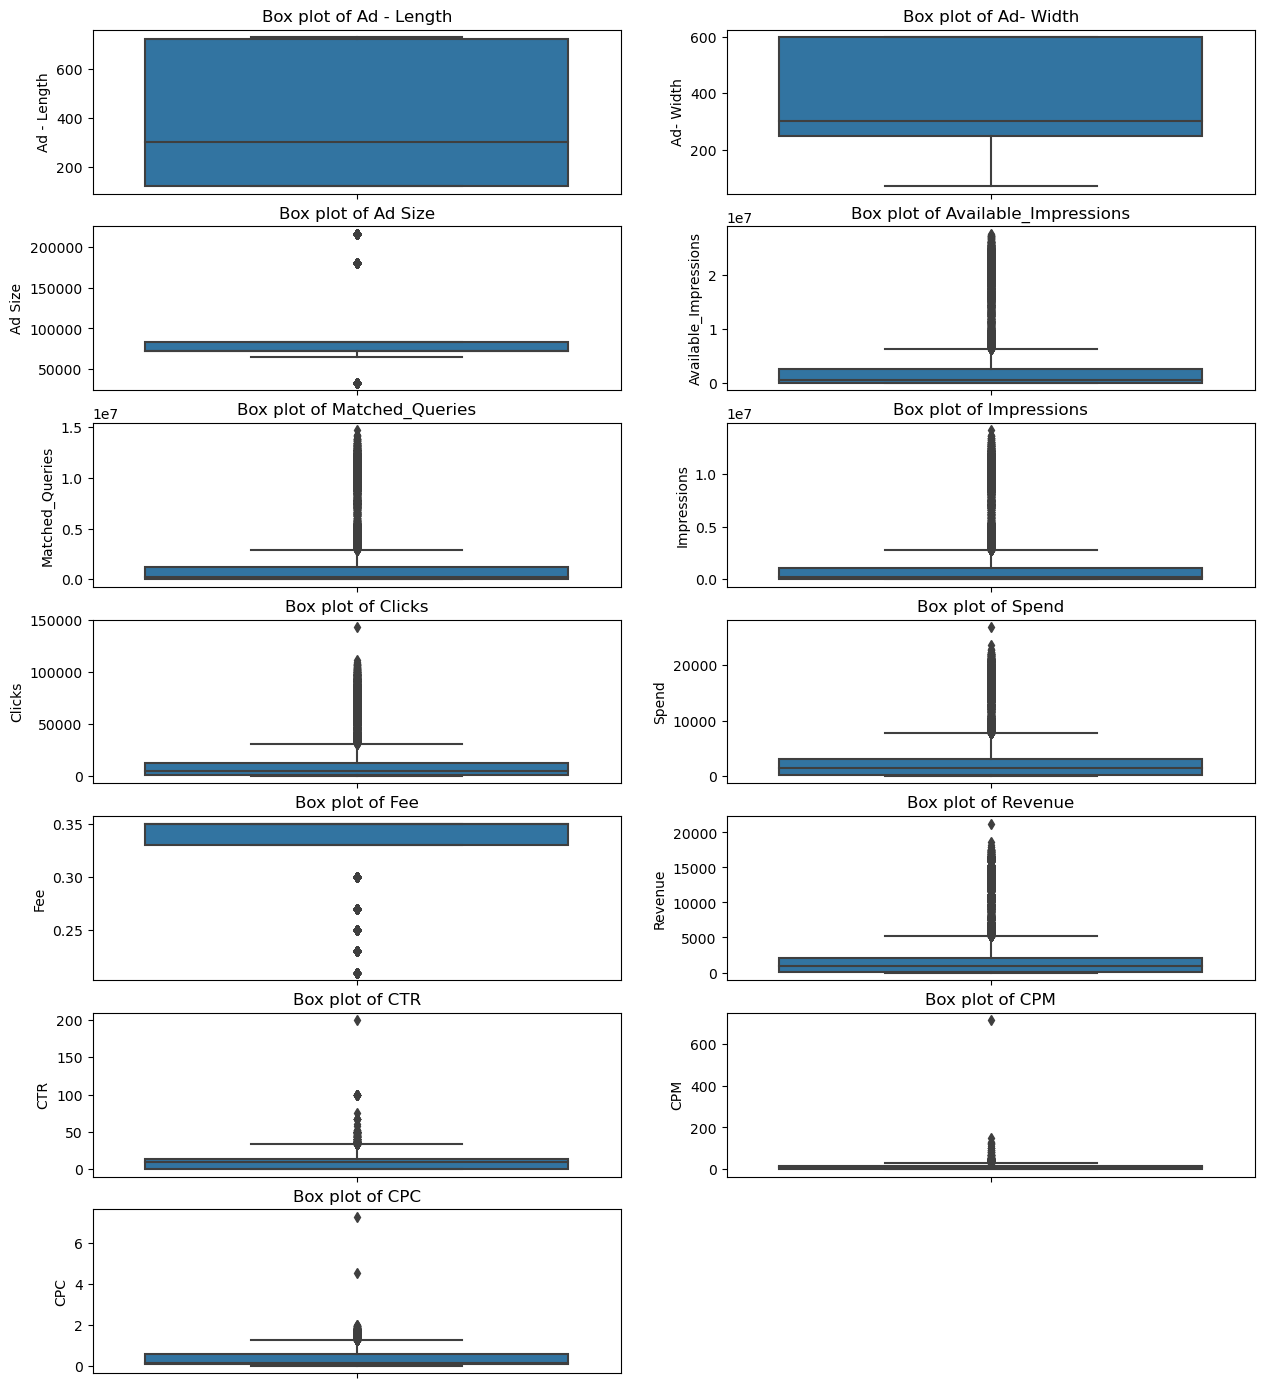

In [14]:
# Box plots
plt.figure(figsize=(15, 20))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(8, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')


plt.show()

In [15]:
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.000000,120.000000,300.000000,7.200000e+02,7.280000e+02
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.000000,250.000000,300.000000,6.000000e+02,6.000000e+02
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.000000,72000.000000,72000.000000,8.400000e+04,2.160000e+05
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.000000,33672.250000,483771.000000,2.527712e+06,2.759286e+07
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.000000,18282.500000,258087.500000,1.180700e+06,1.470202e+07
Impressions,23066.0,1.241520e+06,2.429400e+06,1.000000,7990.500000,225290.000000,1.112428e+06,1.419477e+07
Clicks,23066.0,1.067852e+04,1.735341e+04,1.000000,710.000000,4425.000000,1.279375e+04,1.430490e+05
Spend,23066.0,2.706626e+03,4.067927e+03,0.000000,85.180000,1425.125000,3.121400e+03,2.693187e+04
Fee,23066.0,3.351231e-01,3.196322e-02,0.210000,0.330000,0.350000,3.500000e-01,3.500000e-01
Revenue,23066.0,1.924252e+03,3.105238e+03,0.000000,55.365375,926.335000,2.091338e+03,2.127618e+04


Variables with positive skewness (Available_Impressions, Matched_Queries, Impressions, Clicks, Spend, Revenue) have their mean values pulled towards higher ends due to a few extreme values. Median values are typically lower than the mean in such distributions.

Fee, with negative skewness, has a majority of observations with higher fee percentages, which is reflected in the lower mean compared to the median.

All the numerical values have outliers which needed to be treated.

### Categorical variables:

In [16]:
categorical_columns = ['InventoryType', 'Ad Type', 'Platform', 'Device Type', 'Format']

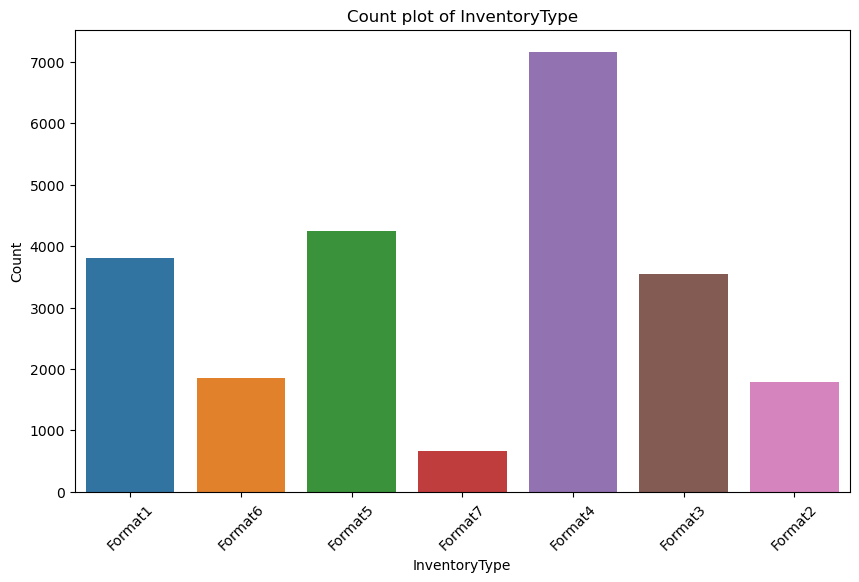

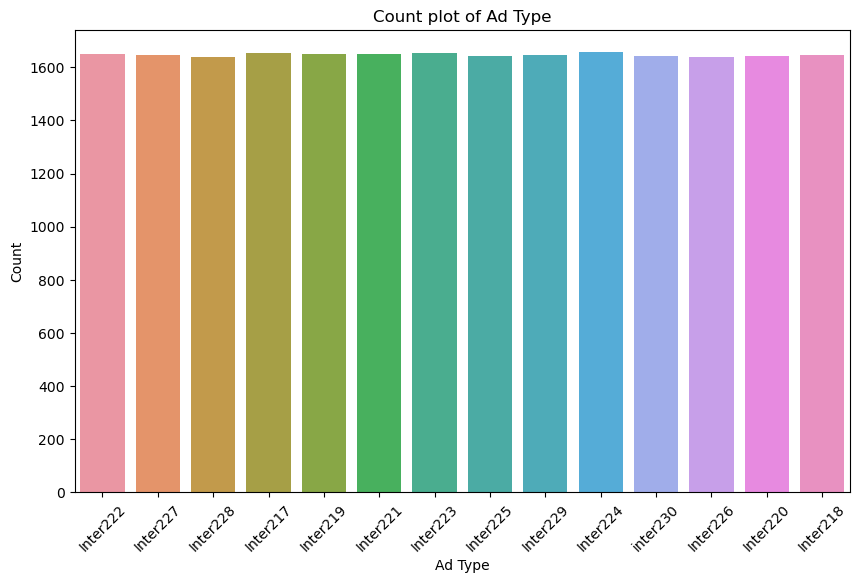

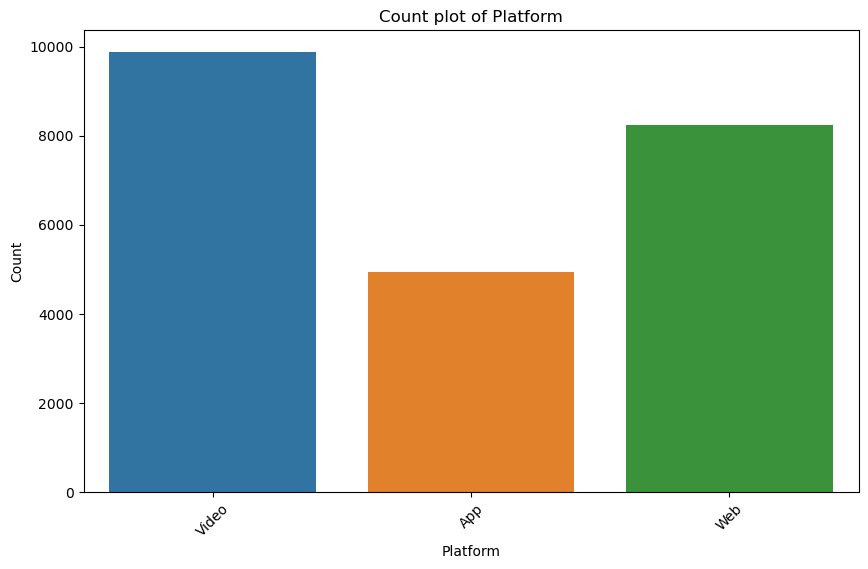

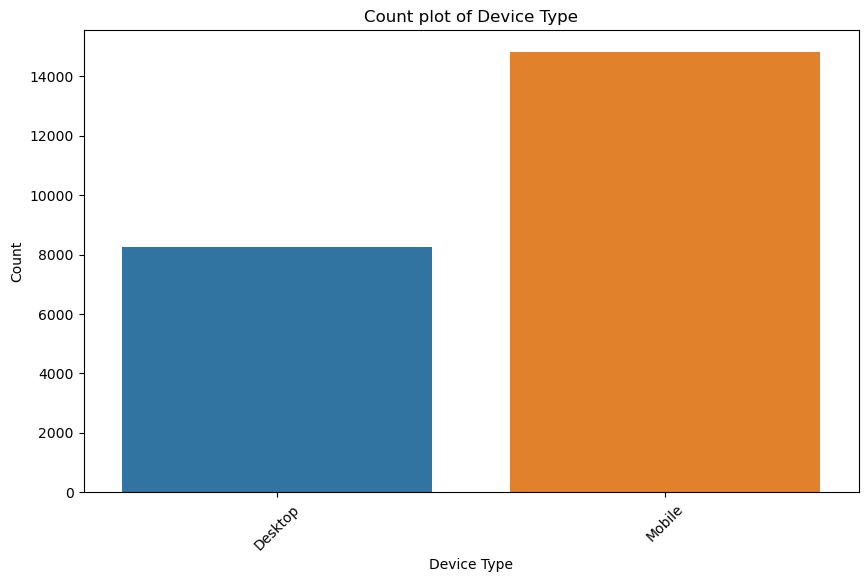

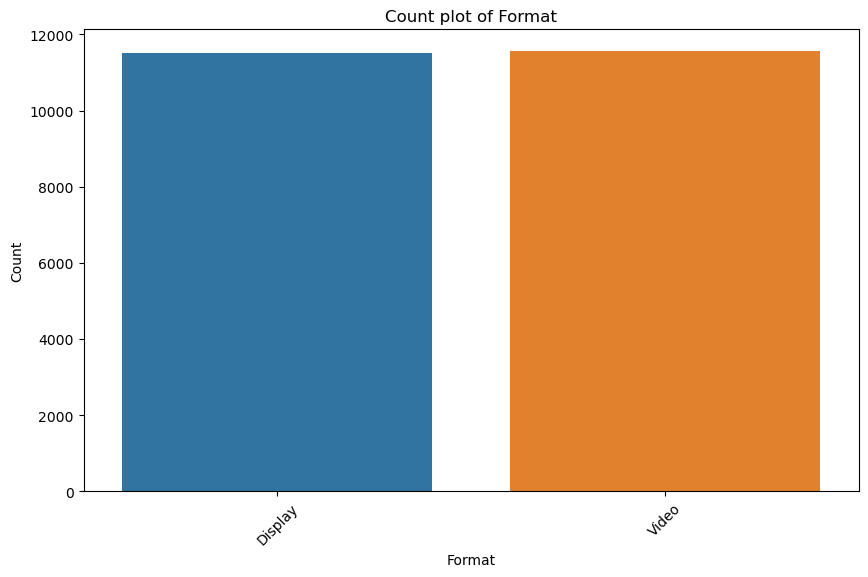

In [17]:
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Count plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [18]:
df[categorical_columns].describe().T

,count,unique,top,freq
InventoryType,23066,7,Format4,7165
Ad Type,23066,14,Inter224,1658
Platform,23066,3,Video,9873
Device Type,23066,2,Mobile,14806
Format,23066,2,Video,11552


Format4 and Format5 are the most common inventory types.

Given the higher count of ads on Video platforms.

mobile devices dominate device type.

Both display and video format are both equal in numbers.

## Bivariate analysis

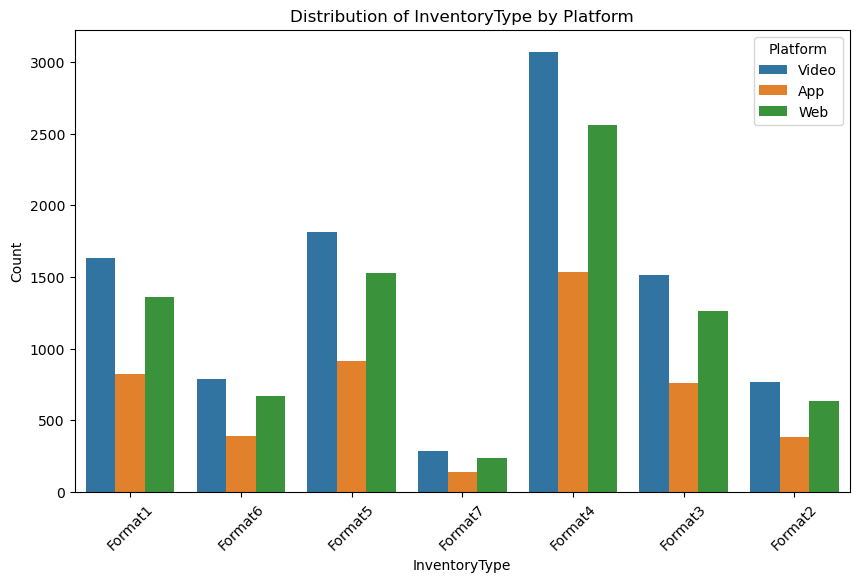

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='InventoryType', hue='Platform')
plt.title('Distribution of InventoryType by Platform')
plt.xlabel('InventoryType')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.show()

In [20]:
print("Value counts for InventoryType by Platform:")
print(pd.crosstab(df['InventoryType'], df['Platform']))

Value counts for InventoryType by Platform:
Platform        App  Video   Web
InventoryType                   
Format1         824   1631  1359
Format2         386    769   634
Format3         759   1516  1265
Format4        1532   3072  2561
Format5         911   1813  1525
Format6         392    788   670
Format7         138    284   237


Format4 is the most common inventory type across all platforms, with the highest counts in App (1532), Video (3072), and Web (2561).

Format7 is the least common inventory type across all platforms, with the lowest counts in App (138), Video (284), and Web (237).

Formats such as Format1, Format2, Format3, Format5, and Format6 show medium usage across all platforms, suggesting these formats have a balanced distribution and are used moderately.

The Video platform generally has higher counts for each inventory type compared to App and Web, indicating a higher usage or preference for displaying ads in video format.

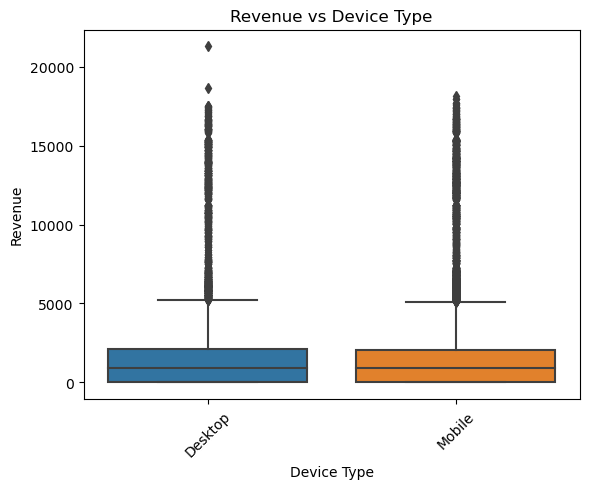

In [21]:
#Box plots for numerical vs categorical variables

sns.boxplot(data=df, x=df['Device Type'], y=df['Revenue'])
plt.title('Revenue vs Device Type')
plt.xticks(rotation=45)
plt.show()

In [22]:
df.groupby('Device Type')['Revenue'].describe().T

Device Type,Desktop,Mobile
count,8260.000000,14806.000000
mean,1932.640726,1919.572596
std,3129.955521,3091.459495
min,0.000000,0.000000
25%,56.192500,55.135000
50%,924.715000,927.815000
75%,2129.287500,2079.262000
max,21276.180000,18143.890000


The overall revenue distribution is quite similar between Desktop and Mobile devices, with close mean, median, and percentile values.

Highest revenue value for Desktop is significantly higher than for Mobile, suggesting that there are some high-revenue outliers in the Desktop category.

Both Desktop and Mobile devices perform similarly in terms of revenue generation, with Desktop devices having a slight edge in the mean and upper percentile values.

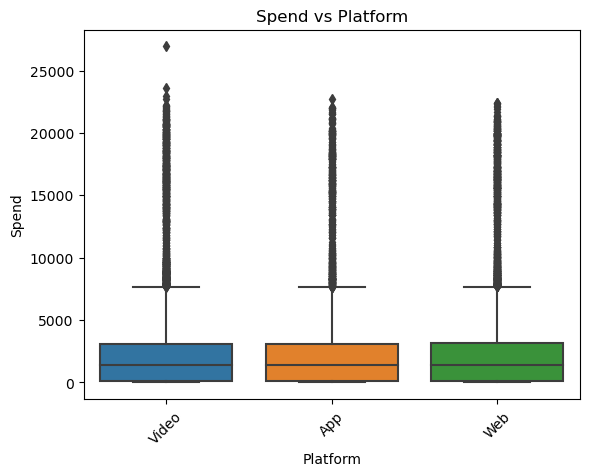

In [23]:
sns.boxplot(data=df, x=df['Platform'], y=df['Spend'])
plt.title('Spend vs Platform')
plt.xticks(rotation=45)
plt.show()

In [24]:
df.groupby('Platform')['Spend'].describe().T

Platform,App,Video,Web
count,4942.000000,9873.000000,8251.000000
mean,2706.130115,2714.877115,2697.049006
std,4046.607138,4075.235143,4072.379477
min,0.000000,0.000000,0.000000
25%,84.965000,87.190000,84.325000
50%,1429.835000,1432.080000,1407.120000
75%,3107.970000,3118.650000,3123.810000
max,22741.540000,26931.870000,22409.040000


The similar spend distributions suggest that resource allocation can be fairly balanced across platforms, with a slight emphasis on monitoring high spends in the Video platform.

There are instances of zero spend across all platforms, indicating that some ad campaigns might have been launched without incurring any cost.

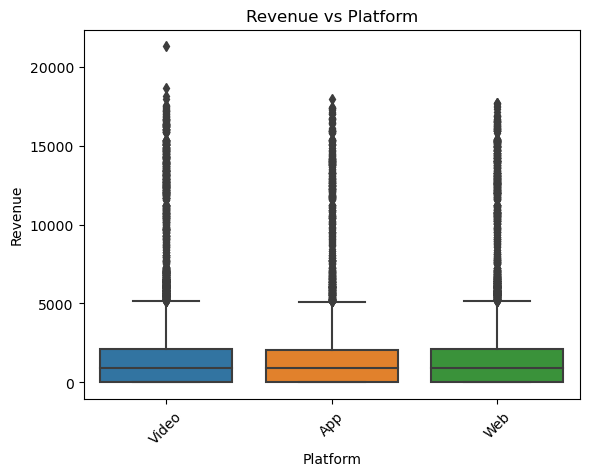

In [25]:
sns.boxplot(data=df, x=df['Platform'], y=df['Revenue'])
plt.title('Revenue vs Platform')
plt.xticks(rotation=45)
plt.show()

In [26]:
df.groupby('Platform')['Revenue'].describe().T

Platform,App,Video,Web
count,4942.000000,9873.000000,8251.000000
mean,1923.528312,1930.336105,1917.406251
std,3088.691099,3111.827566,3107.590122
min,0.000000,0.000000,0.000000
25%,55.227500,56.670000,54.810500
50%,929.395000,930.850000,914.630000
75%,2082.342500,2089.490000,2092.954700
max,17965.820000,21276.180000,17703.140000


The similar revenue distributions suggest that revenue generation is fairly consistent across platforms.

The high maximum revenue in the Video platform suggests a need to monitor high-revenue campaigns more closely.

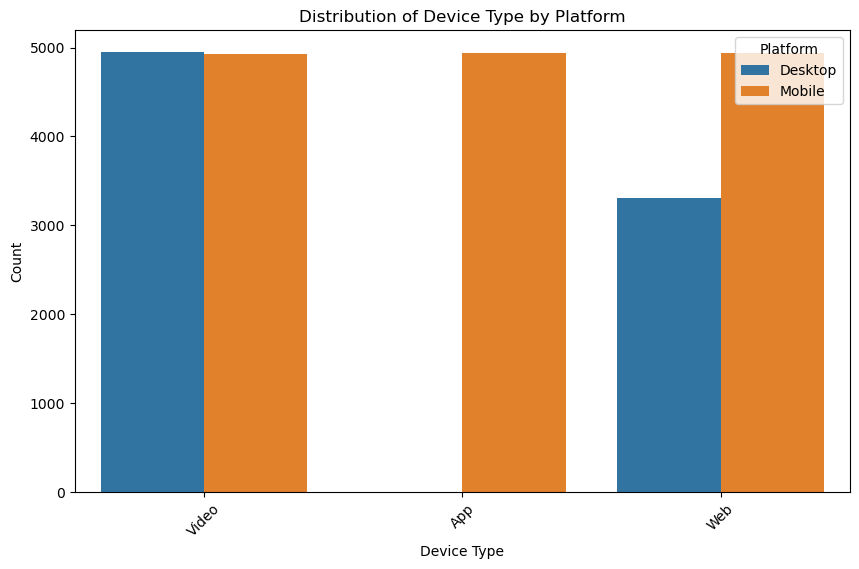

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Platform', hue='Device Type')
plt.title('Distribution of Device Type by Platform')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.show()

In [28]:
print("Value counts for InventoryType by Platform:")
print(pd.crosstab(df['Device Type'], df['Platform']))

Value counts for InventoryType by Platform:
Platform      App  Video   Web
Device Type                   
Desktop         0   4947  3313
Mobile       4942   4926  4938


Mobile devices have a wider distribution and are used almost equally across all platforms, highlighting their importance and user preference in accessing various types of content.

Desktop devices, on the other hand, show strong presence in Video and Web platforms but are completely absent in the App platform, indicating a more limited scope of use.

## Multivariate analysis

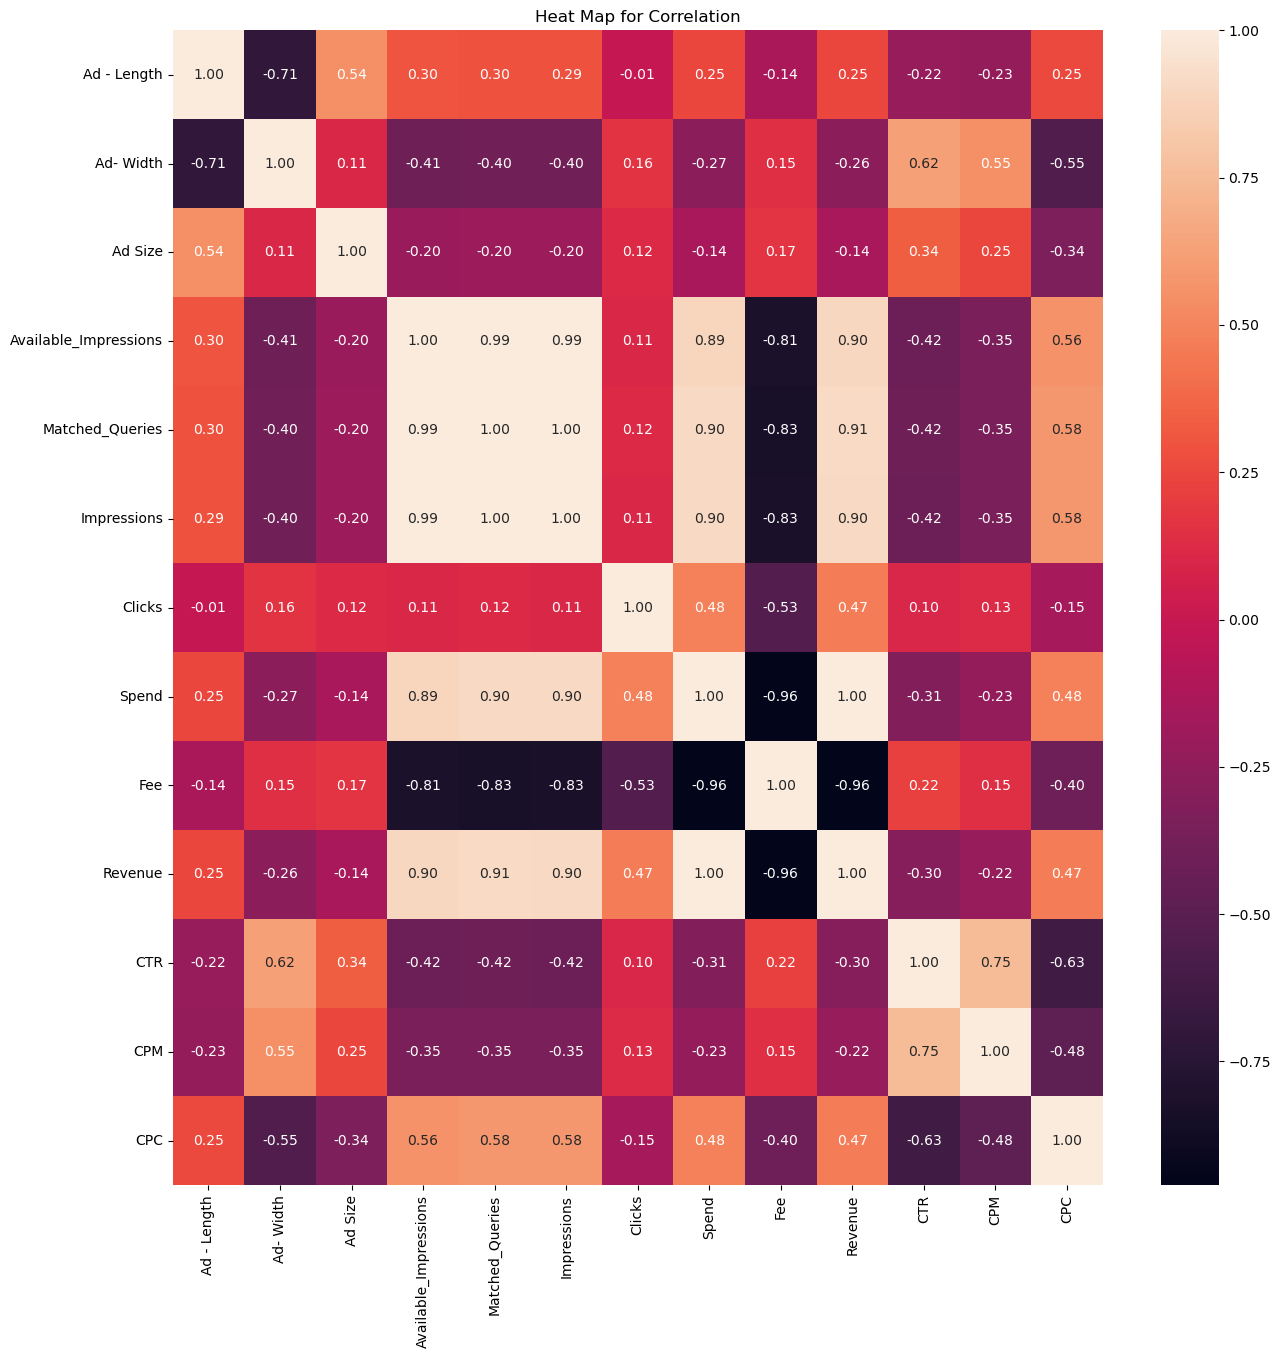

In [29]:
plt.figure(figsize=(15,15))
plt.title('Heat Map for Correlation')
sns.heatmap(df[numerical_columns].corr(),annot=True,fmt=".2f");

In [30]:
corr_matrix = df[numerical_columns].corr()

In [31]:
corr_matrix

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
Ad - Length,1.000000,-0.705374,0.542391,0.300895,0.295007,0.293065,-0.005791,0.248295,-0.138311,0.247679,-0.219470,-0.226378,0.250019
Ad- Width,-0.705374,1.000000,0.110318,-0.410493,-0.397779,-0.398370,0.157888,-0.274170,0.147269,-0.264931,0.619984,0.547426,-0.550953
Ad Size,0.542391,0.110318,1.000000,-0.203853,-0.197089,-0.197462,0.116659,-0.144912,0.169713,-0.144502,0.337746,0.246416,-0.335148
Available_Impressions,0.300895,-0.410493,-0.203853,1.000000,0.994913,0.994817,0.106040,0.891942,-0.814746,0.896342,-0.418755,-0.354405,0.562687
Matched_Queries,0.295007,-0.397779,-0.197089,0.994913,1.000000,0.999922,0.119075,0.904709,-0.832672,0.908222,-0.415027,-0.349014,0.579013
Impressions,0.293065,-0.398370,-0.197462,0.994817,0.999922,1.000000,0.111584,0.901392,-0.828815,0.904864,-0.416585,-0.350765,0.580768
Clicks,-0.005791,0.157888,0.116659,0.106040,0.119075,0.111584,1.000000,0.481659,-0.534996,0.465132,0.101957,0.126054,-0.150058
Spend,0.248295,-0.274170,-0.144912,0.891942,0.904709,0.901392,0.481659,1.000000,-0.958937,0.998766,-0.313589,-0.229061,0.481936
Fee,-0.138311,0.147269,0.169713,-0.814746,-0.832672,-0.828815,-0.534996,-0.958937,1.000000,-0.960154,0.219689,0.148563,-0.403005
Revenue,0.247679,-0.264931,-0.144502,0.896342,0.908222,0.904864,0.465132,0.998766,-0.960154,1.000000,-0.299110,-0.218961,0.470848


There is a very strong positive correlation between available impressions and matched queries.

strong positive correlation exists between available impressions and actual impressions.

Spend is almost perfectly correlated with revenue.

There is a very strong negative correlation between spend and fee.

Matched queries and fee are strongly negatively correlated.

There is a strong positive correlation between spend and impressions.

## Checking for Outliers:

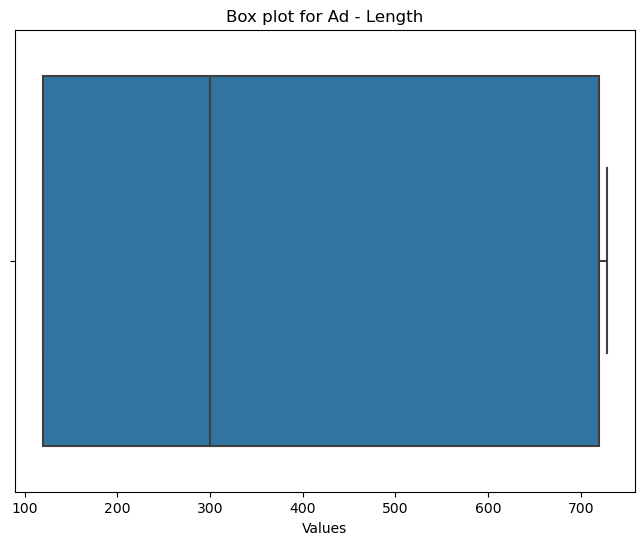

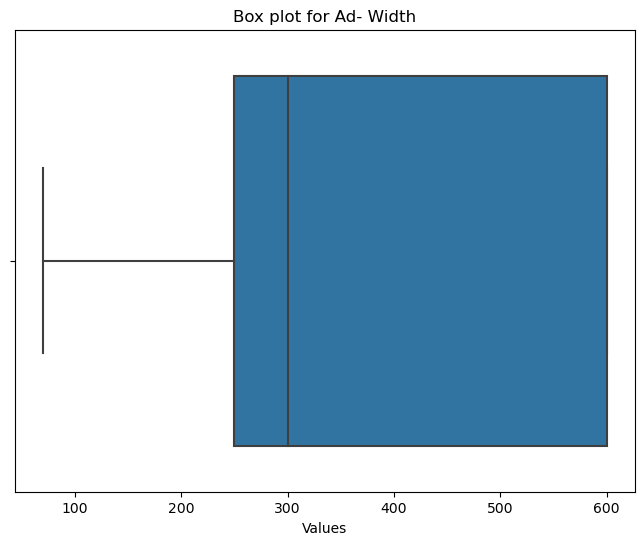

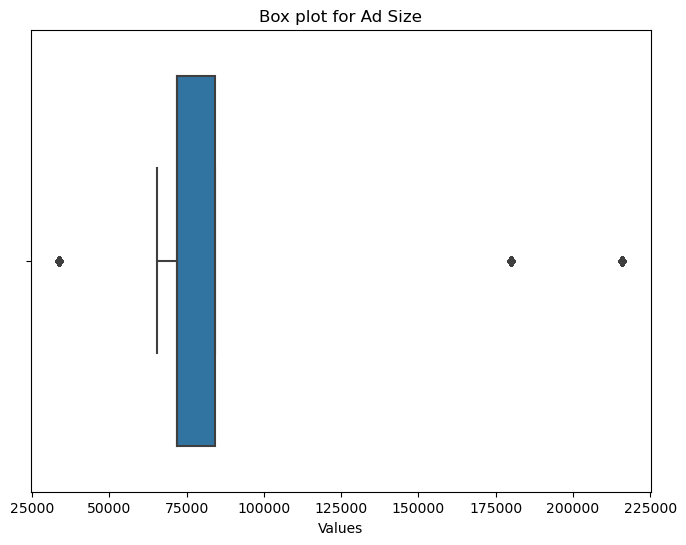

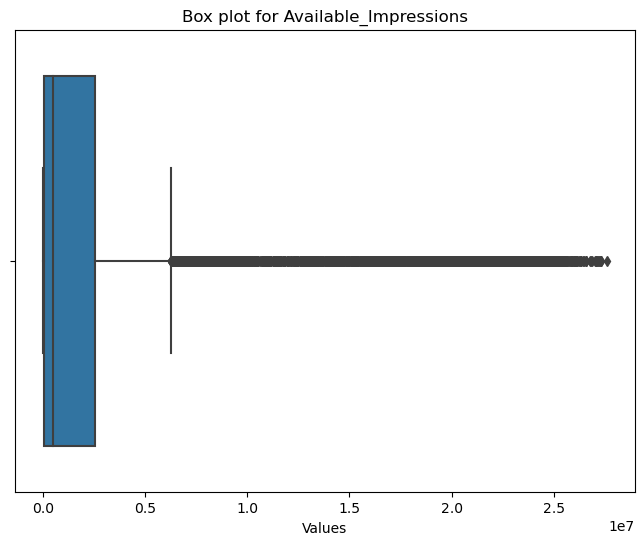

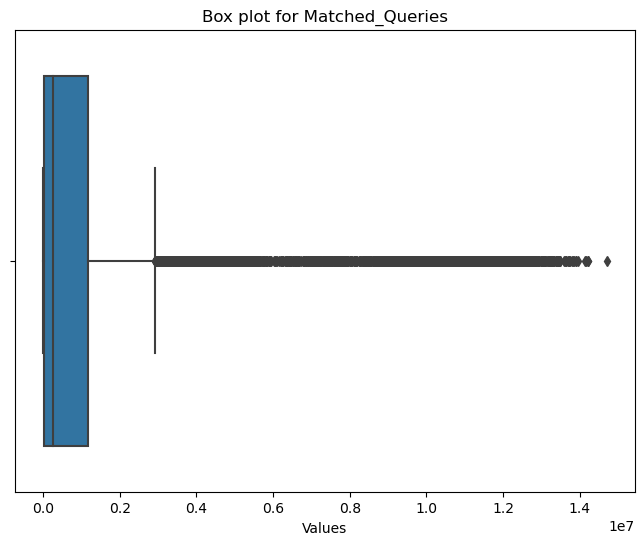

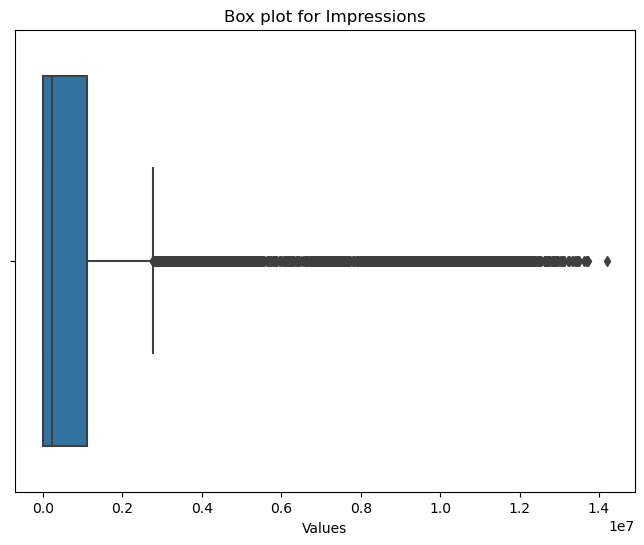

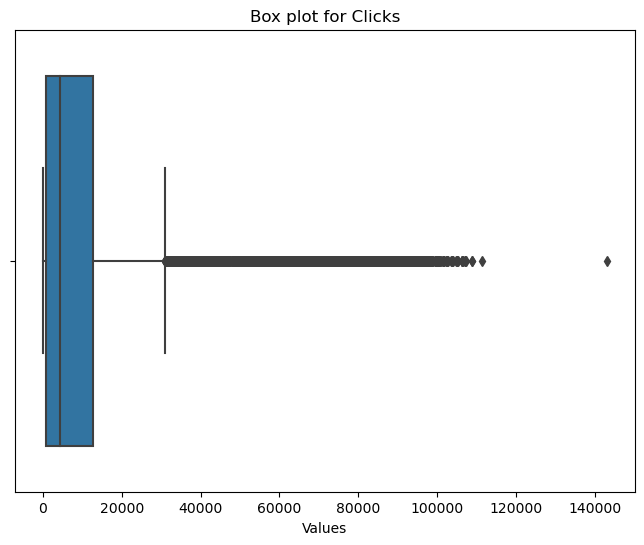

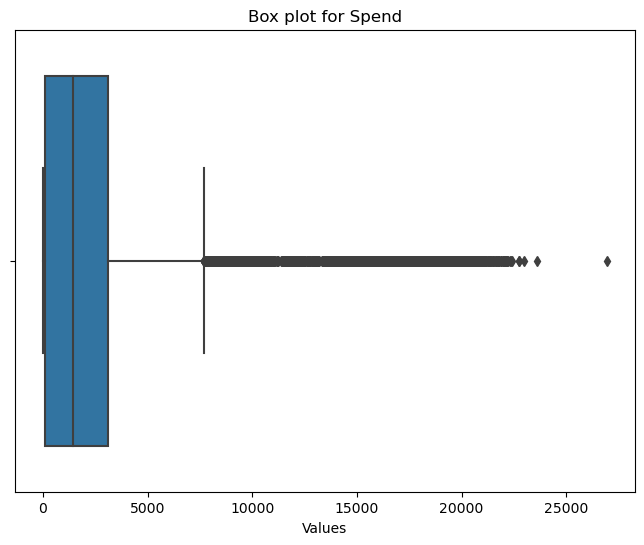

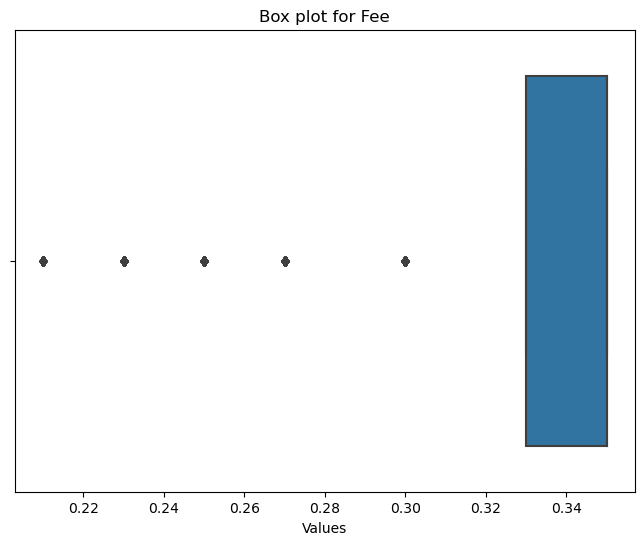

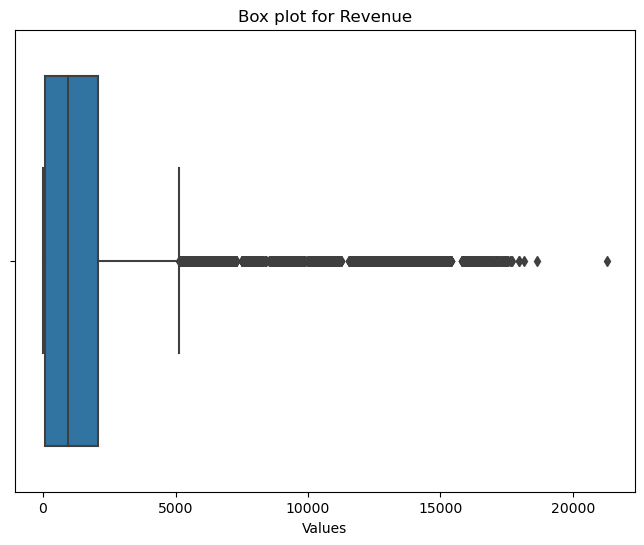

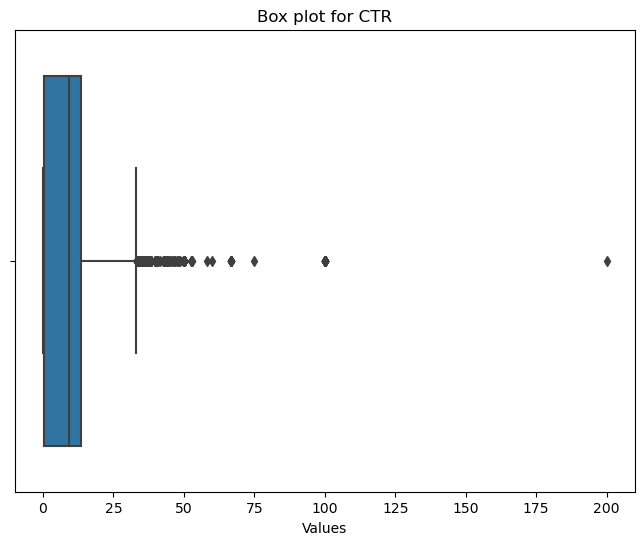

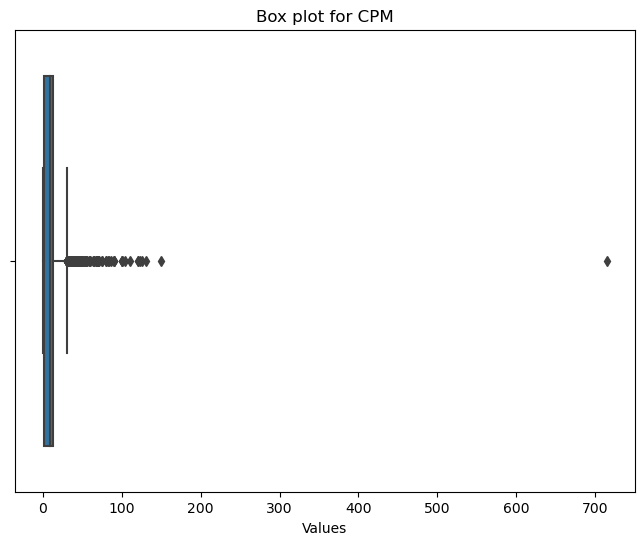

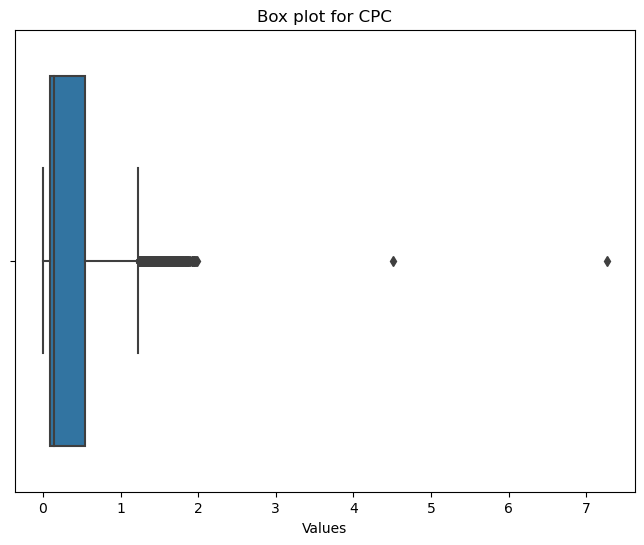

In [32]:
numerical_columns = df.select_dtypes(include=['number']).columns


for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot for {column}')
    plt.xlabel('Values')
    plt.show()

All features except Ad – Length and Ad – Width have outliers as shown by the Box plots.

K-means clustering is sensitive to outliers so outlier treatment is a must and hence done using lower and upper nod method using lower_range= Q1-(1.5 * IQR) and upper_range= Q3+(1.5 * IQR)

In [33]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [34]:
#Cap & floor the values beyond the outlier boundaries
for i in numerical_columns:
    LL, UL = remove_outlier(df[i])
    df[i] = np.where(df[i] > UL, UL, df[i])
    df[i] = np.where(df[i] < LL, LL, df[i])

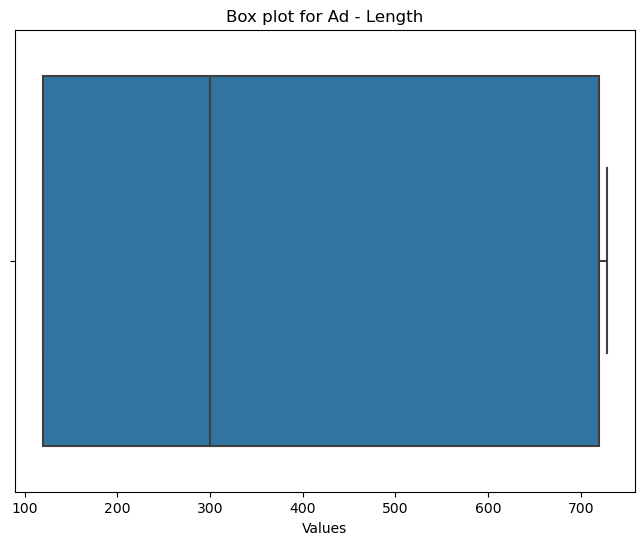

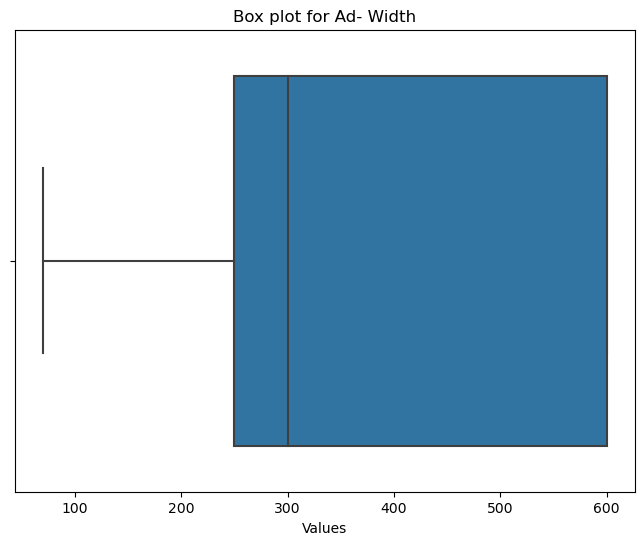

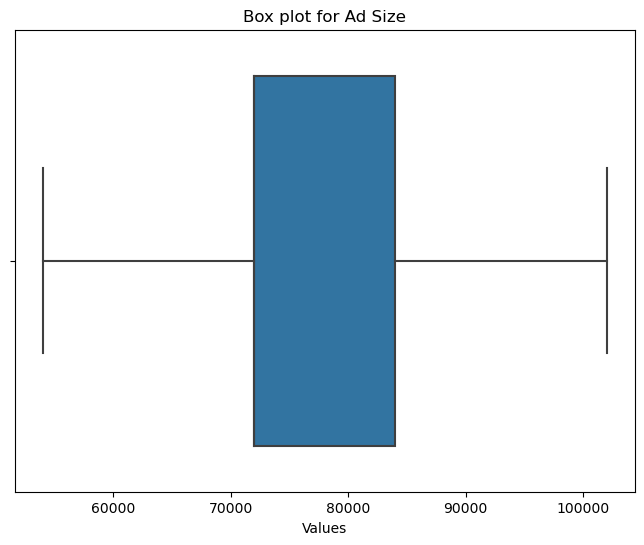

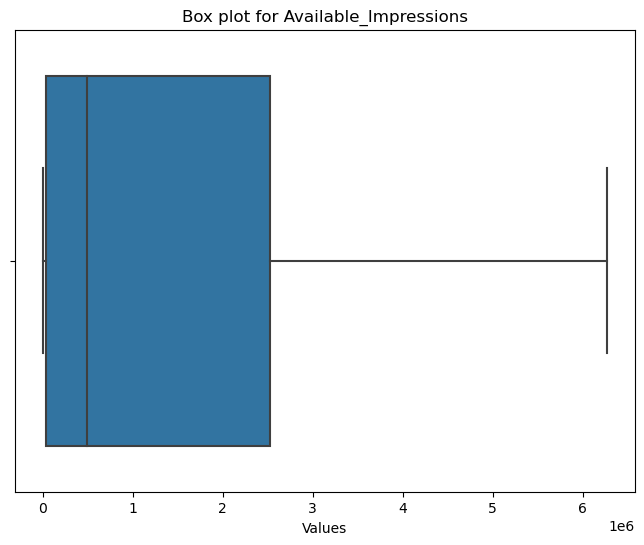

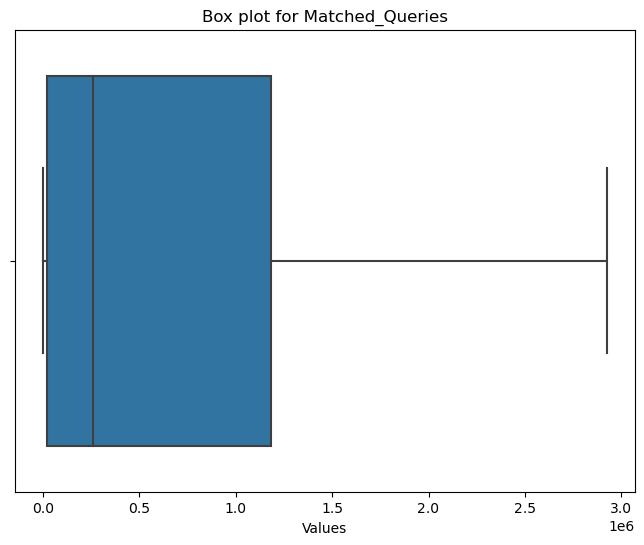

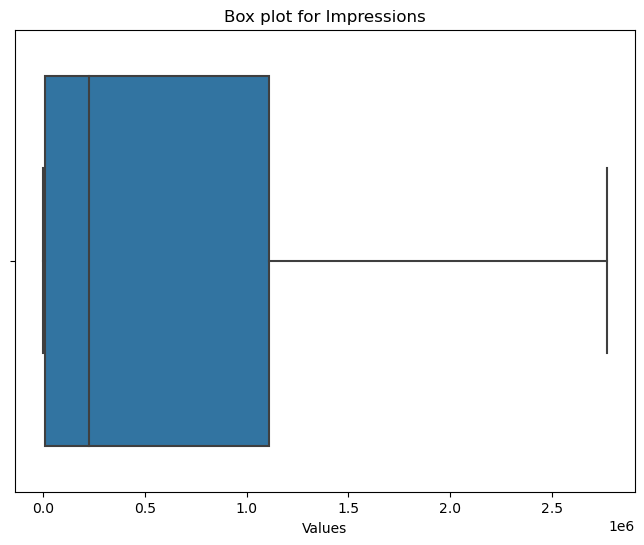

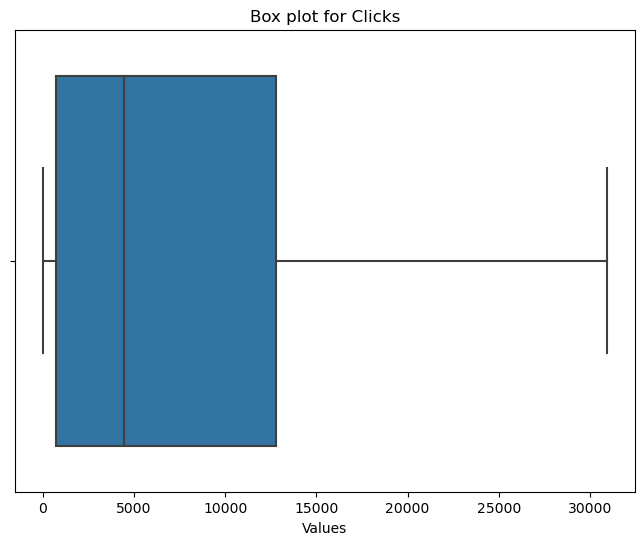

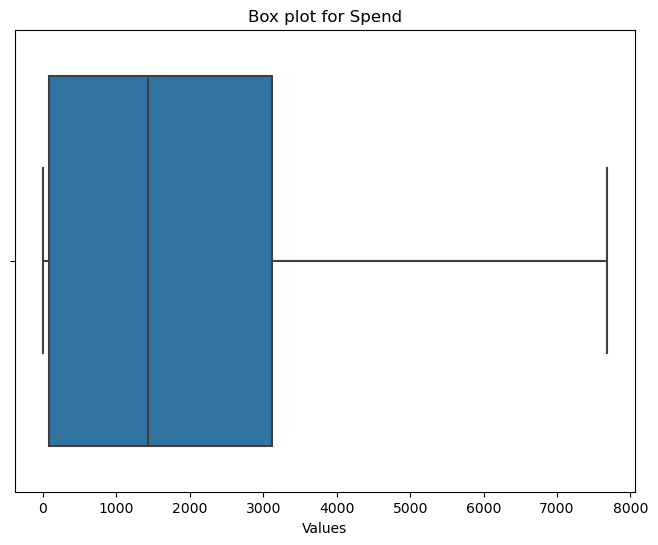

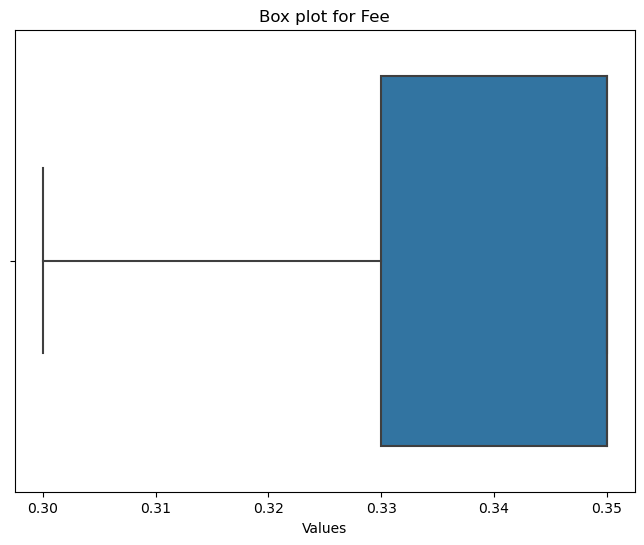

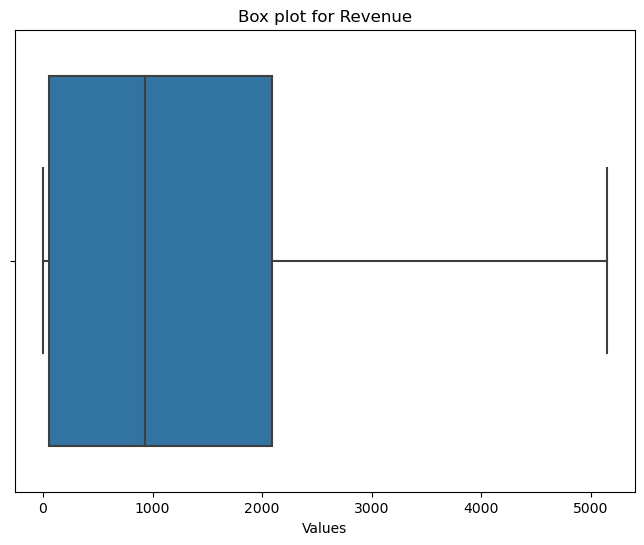

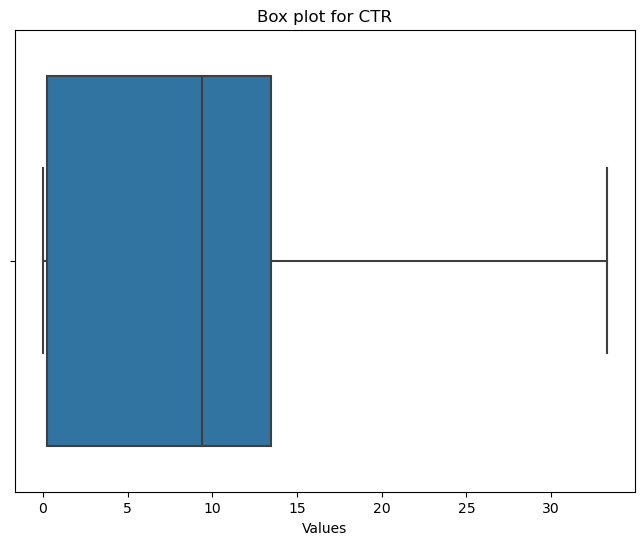

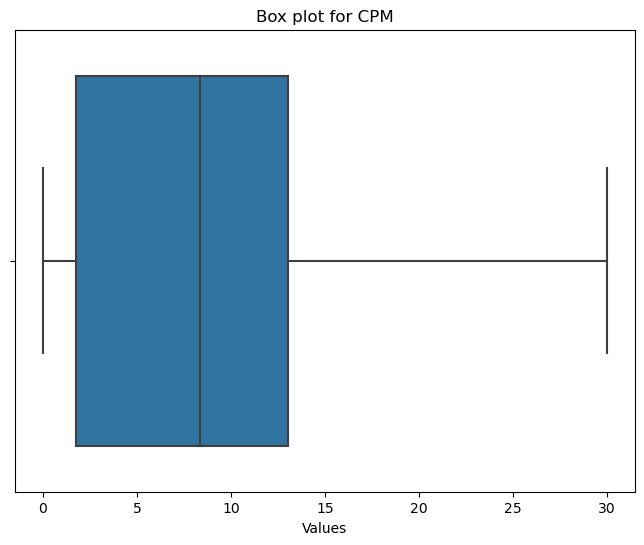

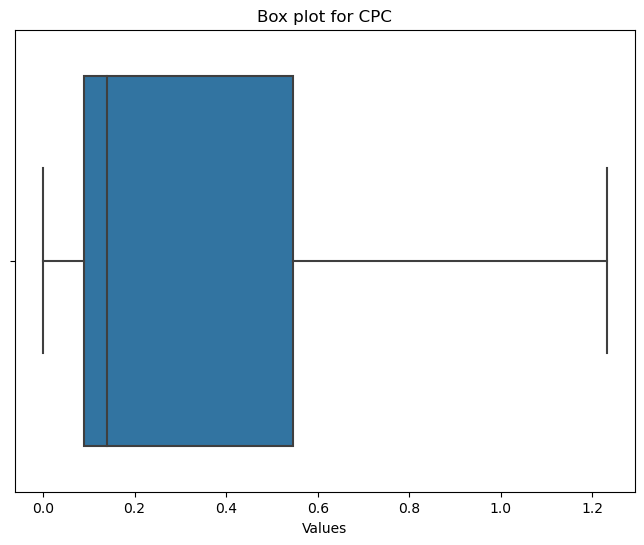

In [35]:
numerical_columns = df.select_dtypes(include=['number']).columns


for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot for {column}')
    plt.xlabel('Values')
    plt.show()

In [36]:
new_df = df[numerical_columns]

In [37]:
new_df.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300.0,250.0,75000.0,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,0.309598,0.0,0.0
1,300.0,250.0,75000.0,1780.0,285.0,285.0,1.0,0.0,0.35,0.0,0.350877,0.0,0.0
2,300.0,250.0,75000.0,2727.0,356.0,355.0,1.0,0.0,0.35,0.0,0.281690,0.0,0.0
3,300.0,250.0,75000.0,2430.0,497.0,495.0,1.0,0.0,0.35,0.0,0.202020,0.0,0.0
4,300.0,250.0,75000.0,1218.0,242.0,242.0,1.0,0.0,0.35,0.0,0.413223,0.0,0.0


## z-score scaling

In [38]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler()

scaled_df = X.fit_transform(new_df)

scaled_df

array([[-0.3644957 , -0.43279676, -0.10251846, ..., -0.95883633,
        -1.19449791, -1.04256138],
       [-0.3644957 , -0.43279676, -0.10251846, ..., -0.95383476,
        -1.19449791, -1.04256138],
       [-0.3644957 , -0.43279676, -0.10251846, ..., -0.96221767,
        -1.19449791, -1.04256138],
       ...,
       [ 1.43309269, -0.18659865,  1.65289551, ...,  3.03580766,
         3.16271759, -0.88461411],
       [-1.13489073,  1.29058999, -0.29756446, ...,  3.03580766,
         3.16271759, -0.82143521],
       [ 1.43309269, -0.18659865,  1.65289551, ...,  3.03580766,
         3.16271759, -0.7582563 ]])

## Dendrogram using Ward linkage and Euclidean distance

### Importing dendrogram and linkage module

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Choosing ward linkage method

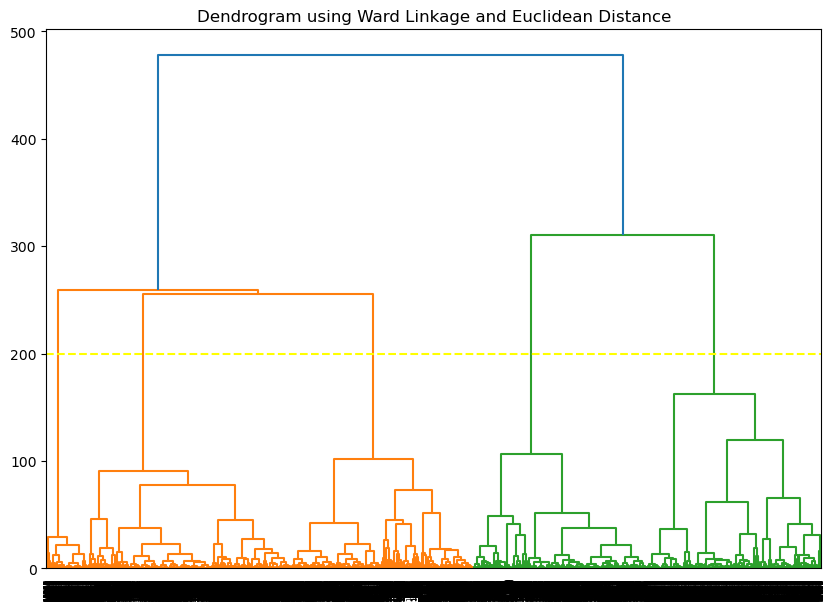

In [40]:
wardlink = linkage(scaled_df, method = 'ward')
plt.figure(figsize=(10, 7))
plt.title("Dendrogram using Ward Linkage and Euclidean Distance")
dend = dendrogram(wardlink)
plt.axhline(y=200, color='yellow', linestyle='--')
plt.show()

 ## Creating Clusters using KMeans

### Forming 2 Clusters with K=2

In [41]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2,random_state=1)

In [42]:
# Fit K means on the scaled_df
k_means.fit(scaled_df)

KMeans(n_clusters=2, random_state=1)

In [43]:
k_means.n_clusters

2

In [44]:
k_means.inertia_

183349.10202886086

### Cluster Output for all the observations

In [45]:
# Get the labels
k_means.labels_

array([1, 1, 1, ..., 1, 1, 1])

### Within Cluster Sum of Squares

In [46]:
round(k_means.inertia_,2)

183349.1

### Calculating WSS

In [47]:
wss =[]
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(round(KM.inertia_,2))

In [48]:
wss

[299858.0,
 183349.1,
 130878.35,
 95133.92,
 61539.19,
 51676.89,
 44598.26,
 40712.91,
 36061.7,
 33562.46]

### Plot the elbow graph

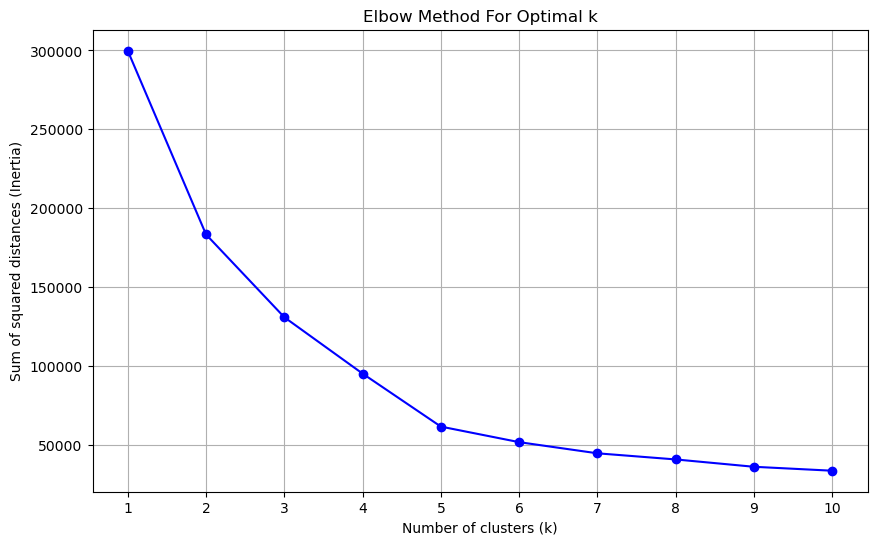

In [49]:
a=[1,2,3,4,5,6,7,8,9,10]
# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(a,wss,'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.xticks(np.arange(1, 11, step=1))
plt.grid(True)
plt.show()

## Silhouette Scores

In [50]:
# Silhouette Analysis
from sklearn.metrics import silhouette_score
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for num_clusters in range_n_clusters:
    
    # initialize K means
    kmeans=KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df)
    cluster_labels=kmeans.labels_
    #Silhouette Score
    silhouette_avg = silhouette_score(scaled_df,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.38572769619101077
For n_clusters=3, the silhouette score is 0.3825486036570082
For n_clusters=4, the silhouette score is 0.4453522168061585
For n_clusters=5, the silhouette score is 0.5240956940501831
For n_clusters=6, the silhouette score is 0.5221533662938636
For n_clusters=7, the silhouette score is 0.5165635029478517
For n_clusters=8, the silhouette score is 0.47972249893837277
For n_clusters=9, the silhouette score is 0.4268561290616763
For n_clusters=10, the silhouette score is 0.4367743981279221


The highest silhouette score is achieved with 5 clusters, indicating that this may be the optimal number of clusters.

Silhouette scores close to 1 indicate dense and well-separated clusters, while scores close to 0 suggest overlapping clusters or clusters that are very close together.

# Cluster Profiling

In [51]:
relevant_columns = ['Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC', 'Device Type']

In [52]:
df_clean = df[relevant_columns]

# Convert 'Device Type' to numerical values, ease jn plotting
df_clean['Device Type'] = df_clean['Device Type'].map({'Desktop': 0, 'Mobile': 1})

In [53]:
X = df_clean.drop('Device Type', axis=1)


In [56]:
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(scaled_df)
Clus_kmeans5 = kmeans.labels_

In [57]:
df_clean['Clus_kmeans5'] = Clus_kmeans5

In [58]:
df_clean['Device Type'] = df_clean['Device Type'].map({0: 'Desktop', 1: 'Mobile'})

In [59]:
cluster_analysis = df_clean.groupby(['Clus_kmeans5', 'Device Type']).mean().reset_index()

In [60]:
metrics = ['Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC']

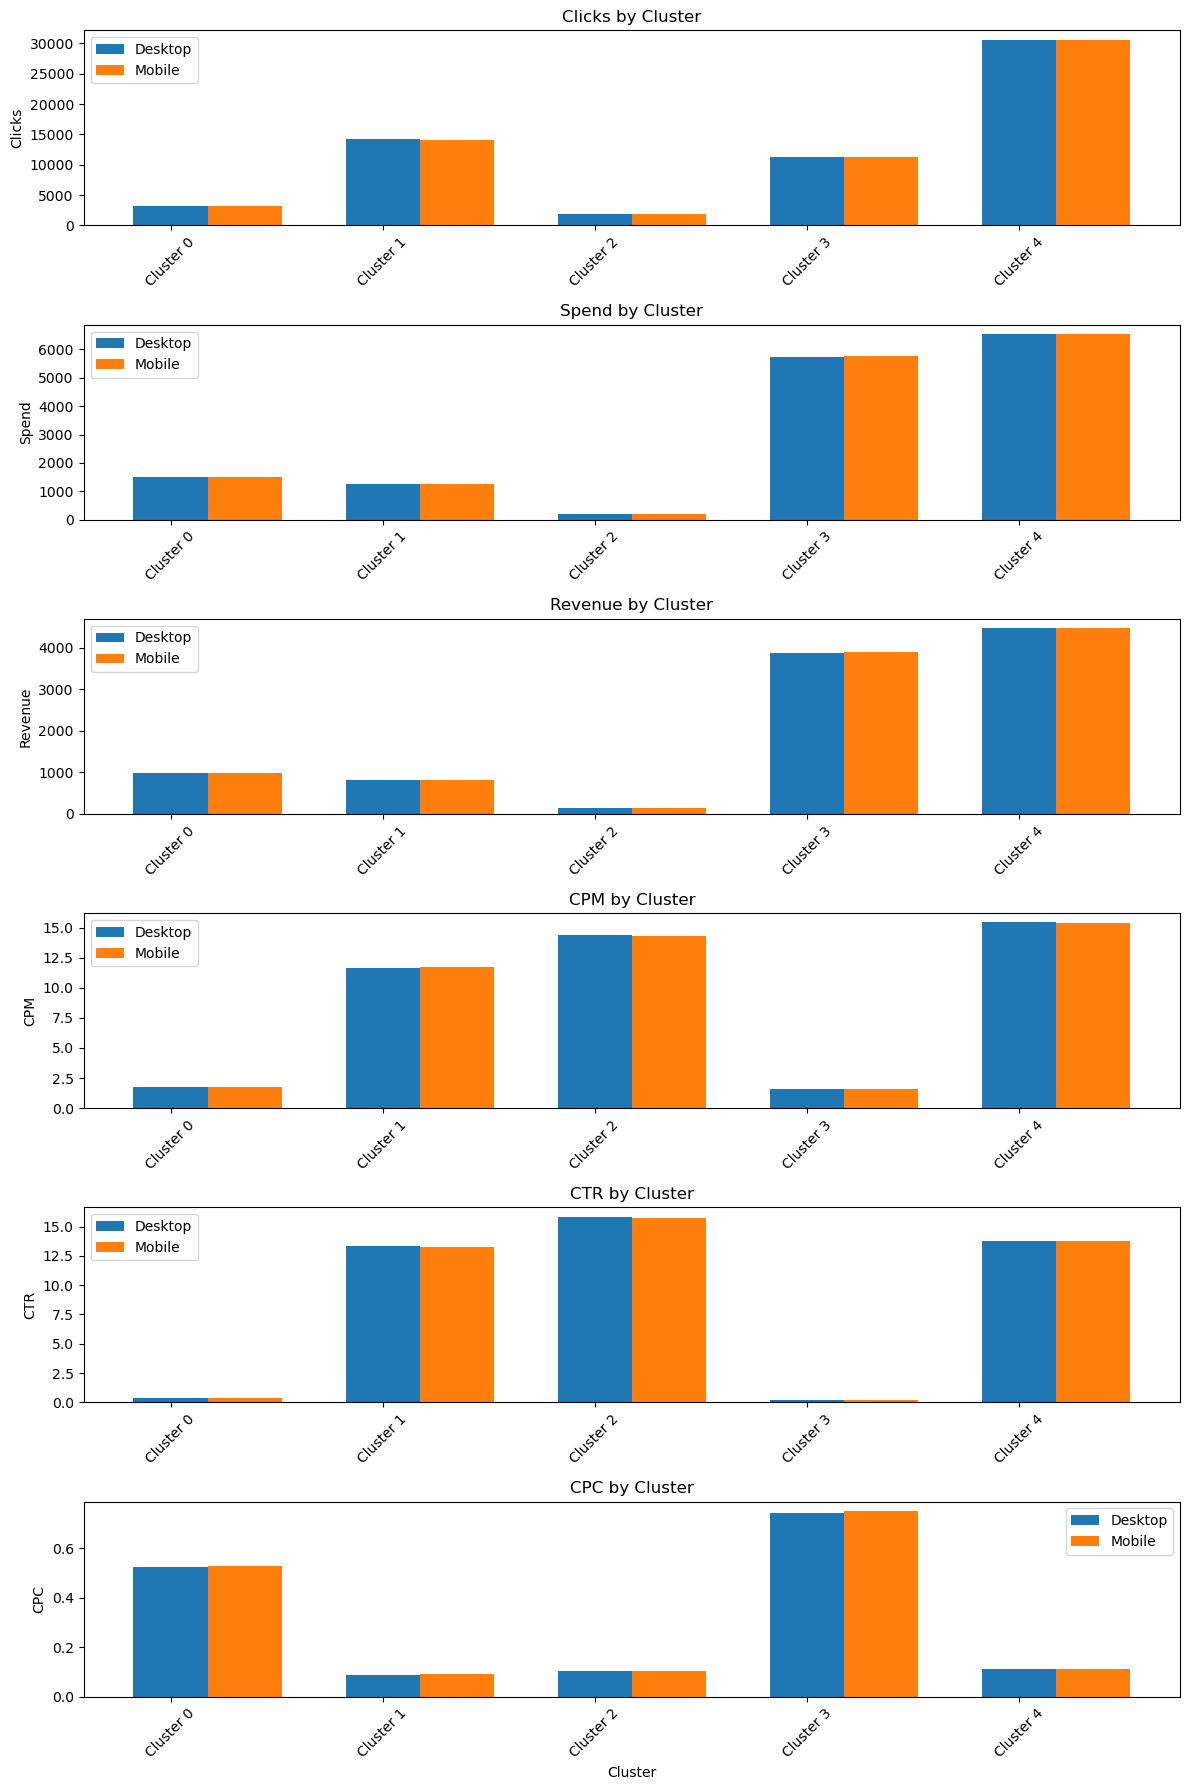

In [61]:
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(12, 18))
for i, metric in enumerate(metrics):
    ax = axes[i]
    device_types = cluster_analysis['Device Type'].unique()
    
    for j, device_type in enumerate(device_types):
        data = cluster_analysis[cluster_analysis['Device Type'] == device_type]
        ax.bar(data['Clus_kmeans5'] + j * width, data[metric], width=width, label=device_type)
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} by Cluster')
    ax.legend()
    ax.set_xticks(range(k))
    ax.set_xticklabels([f'Cluster {cluster}' for cluster in range(k)], rotation=45)

plt.xlabel('Cluster')
plt.tight_layout()
plt.show()

In [62]:
summary_table = cluster_analysis.pivot(index='Clus_kmeans5', columns='Device Type', values=metrics)
summary_table

Clicks                      Spend               \
Device Type        Desktop        Mobile      Desktop       Mobile   
Clus_kmeans5                                                         
0              3267.725314   3260.603163  1495.319825  1502.717003   
1             14285.340569  14039.465777  1251.027671  1252.984401   
2              1950.679487   1894.185946   209.291786   209.090363   
3             11312.535836  11207.966396  5717.075160  5751.919293   
4             30605.904847  30553.418622  6544.608151  6547.376388   

                  Revenue                     CPM                   CTR  \
Device Type       Desktop       Mobile    Desktop     Mobile    Desktop   
Clus_kmeans5                                                              
0              974.211859   979.192636   1.789589   1.788258   0.408147   
1              814.675848   816.022933  11.668965  11.762093  13.304351   
2              136.091814   135.938327  14.345118  14.321643  15.851815   
3             3864.629505  3886.737602   1.561860   1.579743   0.217558   
4             4469.211580  4473.233714  15.431593  15.359699  13.793226   

                              CPC            
Device Type      Mobile   Desktop    Mobile  
Clus_kmeans5                                 
0              0.402325  0.523373  0.530747  
1             13.281544  0.089394  0.090356  
2             15.746764  0.102897  0.102689  
3              0.217063  0.742680  0.752105  
4             13.729611  0.111911  0.111922

Continue to invest heavily in cluster 4 as it yields the highest revenue. Optimize campaigns to further maximize returns, diversify campaigns within this cluster to explore new ad formats and creative strategies that could further enhance performance.

or cluster 3 focus on reducing CPC by negotiating better rates with publishers or optimizing ad delivery settings. Implement strategies to improve CTR, such as refining ad copy, targeting more relevant audiences, and enhancing ad creative.

For cluster 2 investigate factors contributing to low clicks and spend. Optimize campaign targeting and creative to increase engagement.

Consider increasing spend slightly on cluster 1 to test if higher investments can yield higher revenue while maintaining low CPC.

Focus on optimizing ad placements and targeting to improve CTR for cluster 0. Test different creative formats and messaging to enhance engagement.